# Mapeando el Universo



## Análisis y Visualización

 En este primer trabajo comenzaremos a explorar los datos, para ello se propone responder las siguientes consignas:
 
**1 - Análisis general**
 
 * Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 
**2 - Análisis estadístico**
 
 * Es la distribución de galaxia uniforme sobre la bóveda celeste?
 * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.
 * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?
 * Cuál es la distribución del corrimiento al rojo de las galaxias?
 * Existe correlación entre las diferentes variables?
 * Realicen gráficos boxplot para identificar outliers.
 * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?
 * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.
 * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

### Lectura de datos

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
filename = "dataset/dataset_short.csv"

In [4]:
df = pd.read_csv(filename,index_col=0)

In [5]:
df.index.max()

3341830154740590592

In [6]:
df.shape

(5000, 115)

In [7]:
df.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,88.794310,87.360266,88.887199,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,57.854492,56.442004,56.147341,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-83.074030,-90.508710,-90.101060,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,43.378330,44.293123,46.491595,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,88.246740,86.045460,89.176195,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,134.898150,130.424700,131.439100,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604300,240.368900,255.055200,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440


### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [8]:
filename = 'dataset/dataset_short_zoo.csv'

In [9]:
zoo = pd.read_csv(filename,index_col=0)

In [10]:
zoo[:5]

,spiral,elliptical,uncertain
specobjid,,,
2102060129527556096,0,0,1
2006529611202062336,0,0,1
2489490101873174528,1,0,0
453783048702420992,0,0,1
2665066165524523008,0,0,1


In [11]:
data = df.join(zoo)

In [12]:
data.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454,0.28880,0.099800,0.611400
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687,0.45325,0.299763,0.487481
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578,0.00000,0.000000,0.000000
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518,0.00000,0.000000,0.000000
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355,0.00000,0.000000,1.000000
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167,1.00000,0.000000,1.000000
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440,1.00000,1.000000,1.000000


# **Resolución Punto 1 - Análisis general**
 
 * Descripción del conjunto de datos (cantidad de variables, qué representa cada una, tipo, etc.)
 * ¿cuáles creen que serían las variables más importantes a considerar?

In [13]:
data.shape

(5000, 118)

In [14]:
np.asarray([list(data.columns)])

array([['z', 'zErr', 'zWarning', 'subClass', 'velDisp', 'velDispErr',
        'ra', 'dec', 'raErr', 'decErr', 'modelMag_u', 'modelMag_g',
        'modelMag_r', 'modelMag_i', 'modelMag_z', 'modelMagErr_u',
        'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
        'modelMagErr_z', 'petroMag_u', 'petroMag_g', 'petroMag_r',
        'petroMag_i', 'petroMag_z', 'petroMagErr_u', 'petroMagErr_g',
        'petroMagErr_r', 'petroMagErr_i', 'petroMagErr_z', 'petroRad_u',
        'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
        'petroRadErr_u', 'petroRadErr_g', 'petroRadErr_r',
        'petroRadErr_i', 'petroRadErr_z', 'petroR50_u', 'petroR50_g',
        'petroR50_r', 'petroR50_i', 'petroR50_z', 'petroR50Err_u',
        'petroR50Err_g', 'petroR50Err_r', 'petroR50Err_i',
        'petroR50Err_z', 'petroR90_u', 'petroR90_g', 'petroR90_r',
        'petroR90_i', 'petroR90_z', 'petroR90Err_u', 'petroR90Err_g',
        'petroR90Err_r', 'petroR90Err_i', 'petroR90Err_z', 'deVRad_u',

In [15]:
data.dtypes

z                float64
zErr             float64
zWarning           int64
subClass          object
velDisp          float64
velDispErr       float64
ra               float64
dec              float64
raErr            float64
decErr           float64
modelMag_u       float64
modelMag_g       float64
modelMag_r       float64
modelMag_i       float64
modelMag_z       float64
modelMagErr_u    float64
modelMagErr_g    float64
modelMagErr_r    float64
modelMagErr_i    float64
modelMagErr_z    float64
petroMag_u       float64
petroMag_g       float64
petroMag_r       float64
petroMag_i       float64
petroMag_z       float64
petroMagErr_u    float64
petroMagErr_g    float64
petroMagErr_r    float64
petroMagErr_i    float64
petroMagErr_z    float64
                  ...   
expRad_i         float64
expRad_z         float64
expRadErr_u      float64
expRadErr_g      float64
expRadErr_r      float64
expRadErr_i      float64
expRadErr_z      float64
expAB_u          float64
expAB_g          float64


**NOTAS:**    
**a)** Contamos con 117 variables iniciales.  

**b)** Las variables son de tipo numéricas (float64, int64) excepto la varibale **subclass** que es de tipo objet (string).   

**c)** Las variables más importantes a considerar en este estudio serían las que nos brinden información del Brillo de las galaxias en las diferentes bandas del espectro electromagnético, para poder estimar a partir de ellas las distancias de las mismas.    

**d)** El brillo se mide en magnitudes teniendo en cuenta 5 bandas (u, g, r, i, z) y se puede calcular mediante diferentes métodos ó modelos:     
* Las magnitudes **ModelMag** para las 5 bandas fotometricas (*u, g, r, i, z*), se corresponden con el modelo (*Vaucouleurs, exponencial*) que mejor ajusta el flujo de la galaxia en la *banda r*. Este mismo modelo y sus parámetros son utilizados para obtener las megnitudes en el resto de las bandas fotometricas. Esto permite que los colores no esten sesgados.   
* Las magnitudes **petroMag_** para las 5 bandas fotometricas (u, g, r, i, z)... Por ejemplo: **petroRad**: se corresponde al radio petrosiano utilizado para obtener las magnitudes petroMag. 

**e)** Información de las variables:
* Las variables **z** y **zErr**, corresponden al *redshift* y su *error*.    
* La variable **zWarning** son *flags* (enteros) que indican si hubieron problemas en el proceso de ajuste para la obtencion del *redshift*. Con el valor 0 y 16 se indica que no hubo problemas.    
* La variable **subClass** indica  una sub-clasificación de las galaxias y qso a partir de la informacion en las lineas de emisión de sus espectros. Los valores posibles que puede tomar esta variable son: 'AGN', 'STARFORMING', 'STARBURST', 'BROADLINE' or NaN.     
* La variable **velDisp** y **velDispErr** indica la *velocidad de disperción* (km/s) de las galaxias y su error. Los valores posibles que toma esta variable, son floats positivos.     
* Las variables **ra**, **dec**, **raErr** y **decErr** son las *coordenadas ecuatoriales* en el sistema J2000 en grados decimales y sus errores.     
* Las variables ubicadas a partir de la columna número 10 hasta la columna número 108, contienen información sobre las magnitudes en las diferentes *bandas fotométricas* y distintos parámetros utilizados para el cálculo de las mismas.   
* Las variables a partir de la columna 109 se corresponden con los paramentros utilizados para calcular los distintos modelos (*Vaucouleurs, Exponencial*); por ejemplo: 
* * **rdeV** y **rExp**: radio efectivo para los distintos modelos,    
* * **abDeV** y **abExp**: relación de ejes para el modelo con mejor ajuste,     
* * **phiDeV** y **phiExp**, etc.   
* Las variables que comienzan con **extinction_** se corresponden a las correcciones en magnitud por extinción galactica para las 5 bandas fotometricas. El mapa de extinción utilizado es el de *Schlegel et al. 1998*.     
* Las variables **spiral**, **elliptical** y **uncertain** se corresponden a la clasificacion de galaxias obtenidas a partir del relevamiento Zoo. Los valores posibles son 0 y 1 (False=0, True=1).    
* La variable **intervals ...** y **z_segment** se corresponden con intervalos en *redshift* de ..?    

# 2 **Resolución 2 - Análisis estadístico**
 
## 2.1) Distribución de las galaxias  sobre la bóveda celeste

Text(0.5,1,'Distribución de galaxias sobre la bóveda celeste')

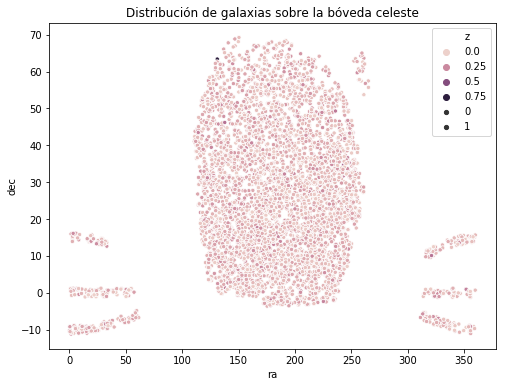

In [16]:
f = plt.figure(figsize=(8,6))
ax = f.add_subplot(111)

seaborn.scatterplot(x='ra',y='dec',data=df,hue='z',size=1,ax=ax)
plt.title('Distribución de galaxias sobre la bóveda celeste')

**NOTA**     
**a)** En este gráfico podemos observar la distribución en el cielo de las galaxias, y podemos apreciar si están distribuidas de forma uniforme respecto de las distancias o no. Debemos tener en cuenta que en este gráfico apreciamos lo que sería la parte norte de la bóveda celeste, ya que la declinación llega hasta -10º (no alcanza a cubrir hasta los -70º que abarcarían el total de la información).   

eje y (dec)= Declinación medida en grados   
eje x (ra)= asención medida en grados   
z (redshift)= distancia   

Text(0.5,1,'Distribución de galaxias según PetroMag')

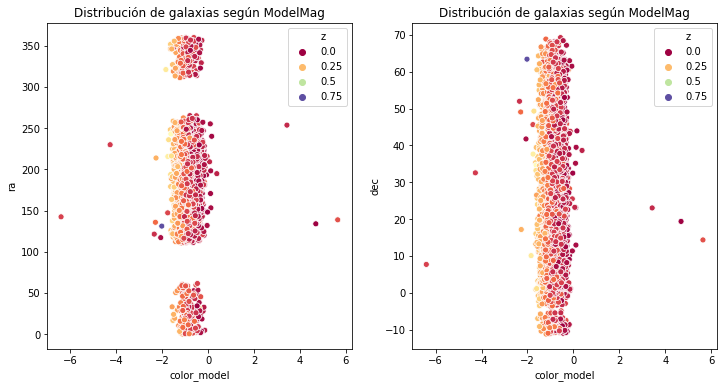

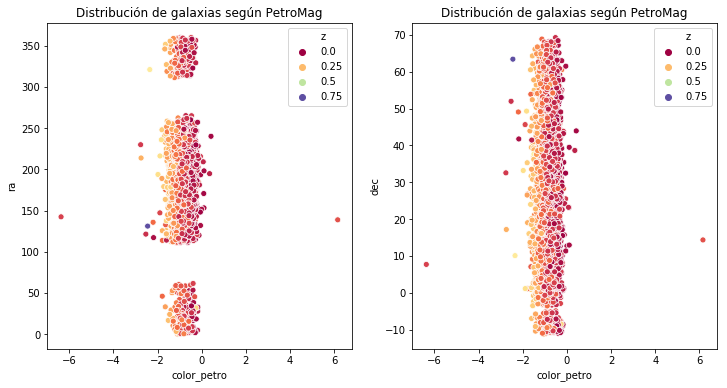

In [17]:
# distribución de galaxias según el color
# (banda r) - (banda g) = color

# ModelMag
data['color_model'] = data['modelMag_r'] - data['modelMag_g']

plt.figure (figsize=(12,6))

plt.subplot(121)
plt1=seaborn.scatterplot(data=data, x='color_model', y='ra', hue='z', palette='Spectral')
plt.title('Distribución de galaxias según ModelMag')

plt.subplot(122)
plt2=seaborn.scatterplot(data=data, x='color_model', y='dec',hue='z', palette='Spectral')
plt.title('Distribución de galaxias según ModelMag')

# PetroMag
data['color_petro'] = data['petroMag_r'] - data['petroMag_g']

plt.figure (figsize=(12,6))

plt.subplot(121)
plt1=seaborn.scatterplot(data=data, x='color_petro', y='ra', hue='z', palette='Spectral')
plt.title('Distribución de galaxias según PetroMag')

plt.subplot(122)
plt2=seaborn.scatterplot(data=data, x='color_petro', y='dec',hue='z', palette='Spectral')
plt.title('Distribución de galaxias según PetroMag')

**NOTA:**    
**a)** La distribución de galaxias calculada teniendo en cuenta la diferencia entre las bandas **r** y **g** para los métodos **ModelMag** y **PetroMag** es muy similar. Por lo que la información de brillo calculada por ambos métodos en esta instancia no se diferenciaría demasiado.

## 2.2) Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.

In [18]:
# Tomamos una rebanada sobre el plano celeste

slice_dec = [30,40]
dataset_cut = data
dataset_cut['intervals'] = pd.cut(data['dec'],slice_dec)
dataset_sliced = dataset_cut[dataset_cut['intervals'] == pd.Interval(slice_dec[0],slice_dec[1])]

In [19]:
# Calculamos la diferencia entre las bandas r y g para la rebanada

dataset_sliced['color_model'] = data['modelMag_r'] - data['modelMag_g']
dataset_sliced['color_petro'] = data['petroMag_r'] - data['petroMag_g']

Text(0.5,1,'Distribución de galaxias según PetroMag')

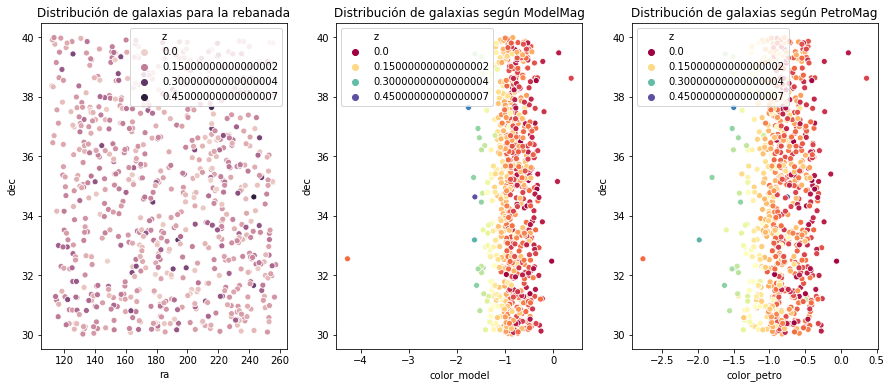

In [20]:
# Realizamos el gráfico de distribución de galaxias utilizando la rebanada calculada anteriormente

plt.figure (figsize=(15,6))

plt.subplot(131)
#plt1 = plt.figure(figsize=(8,8))
#ax = plt1.add_subplot(111)
plt1=seaborn.scatterplot(data=dataset_sliced,x='ra',y='dec',hue='z') #,size=1,ax=ax
plt.title('Distribución de galaxias para la rebanada')

plt.subplot(132)
plt2=seaborn.scatterplot(data=dataset_sliced, x='color_model', y='dec', hue='z', palette='Spectral')
plt.title('Distribución de galaxias según ModelMag')

plt.subplot(133)
plt3=seaborn.scatterplot(data=dataset_sliced, x='color_petro', y='dec',hue='z', palette='Spectral')
plt.title('Distribución de galaxias según PetroMag')

**NOTAS:**    
**a)** En el primer gráfico observamos la distribución de galaxias obtenida para la rebanada.    

**b)** EL segundo y tercer gráfico muestran la distribución de galaxias calculada teniendo en cuenta la diferencia entre las bandas **r** y **g** para los métodos **ModelMag** y **PetroMag** en función de la declinación.    

**c)** En este caso podemos apreciar una diferencia más notoría entre la información aportada por los métodos **ModelMag** y **PetroMag**, que la que se podía apreciar en el análisis del conjunto completo de galaxias. En la información presente en la rebanada podemos ver que hay una mayor dispersión en la banda de color calculada por el método **PetroMag** que por el método **ModelMag**.

Text(0.5,1,'Distribución de galaxias de la rebanada según el redshift')

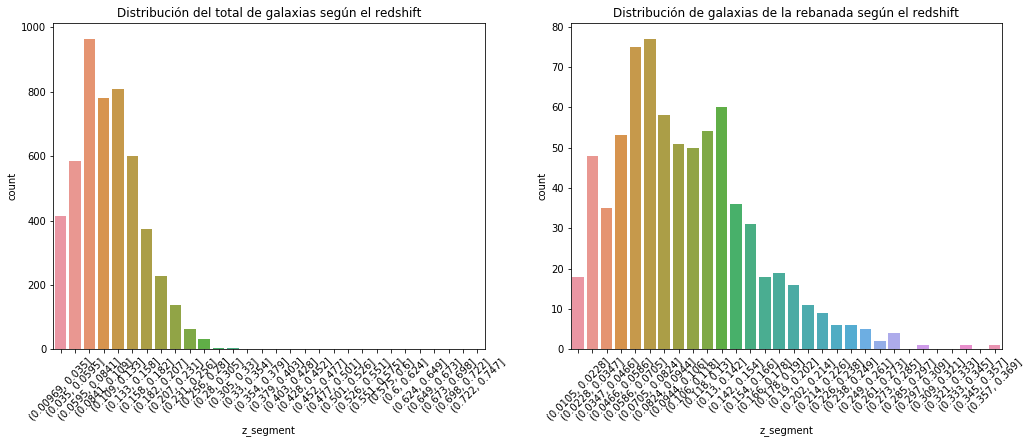

In [21]:
# Obtenemos la distribución de las galaxias teniendo en cuenta el corrimiento al rojo (redshift) como distancia

# Distribucuón del conjunto total de galaxias

plt.figure(figsize=(17,6))

plt.subplot(121)
data['z_segment'] = pd.cut(data['z'],30)
plt1=seaborn.countplot(data=data, x='z_segment')
plt.xticks(rotation=45)
plt.title('Distribución del total de galaxias según el redshift')

# Distribucuón de galaxias de la rebanada

plt.subplot(122)
dataset_sliced['z_segment'] = pd.cut(dataset_sliced['z'],30)
plt2=seaborn.countplot(data=dataset_sliced, x='z_segment')
plt.xticks(rotation=45)
plt.title('Distribución de galaxias de la rebanada según el redshift')

**NOTA:**     
**a)** Podemos observar que las galaxias según el **redshift** siguen una distribución con asimetría positiva similar a una Poisson, tanto para el conjunto total de galaxias como para la rebanada. Esto nos habla de que la información que tenemos de la mayoría de galaxias se encuentran en distancias mas cercanas y que a medida que están mas lejanas tenemos menos galaxias detectadas.

 ## *2.3) Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?

Text(0.5,1,'Histograma de distribución de bandas (PetroMag)')

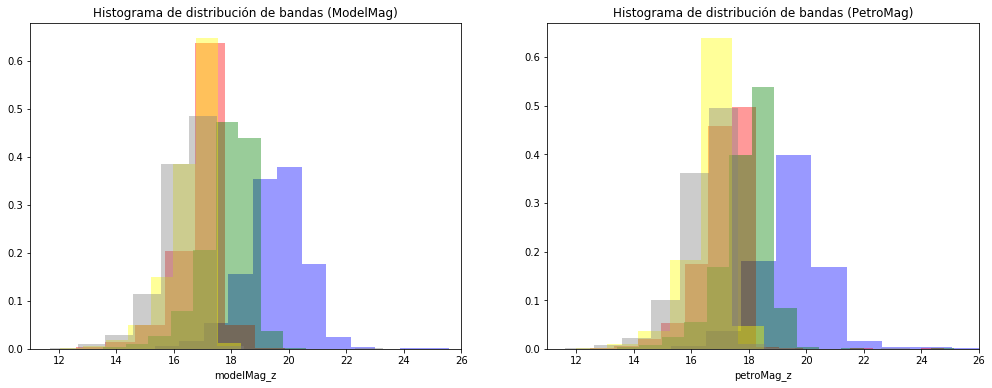

In [22]:
# Distribución de ModelMag en las diferentes bandas (u, r, g, i, z)

plt.figure(figsize=(17,6))

plt.subplot(121)
seaborn.distplot(data.modelMag_u, color='blue', label='u', bins=15, kde=False, norm_hist=True)
seaborn.distplot(data.modelMag_r, color='red', label='r', bins=15, kde=False, norm_hist=True)
seaborn.distplot(data.modelMag_g, color='green', label='g', bins=15, kde=False, norm_hist=True)
seaborn.distplot(data.modelMag_i, color='yellow', label='i', bins=15, kde=False, norm_hist=True)
seaborn.distplot(data.modelMag_z, color='grey', label='z', bins=15, kde=False, norm_hist=True)
plt.xlim(11,26)
plt.title('Histograma de distribución de bandas (ModelMag)')

plt.subplot(122)
seaborn.distplot(data.petroMag_u, color='blue', label='u', bins=15, kde=False, norm_hist=True)
seaborn.distplot(data.petroMag_r, color='red', label='r', bins=15, kde=False, norm_hist=True)
seaborn.distplot(data.petroMag_g, color='green', label='g', bins=15, kde=False, norm_hist=True)
seaborn.distplot(data.petroMag_i, color='yellow', label='i', bins=15, kde=False, norm_hist=True)
seaborn.distplot(data.petroMag_z, color='grey', label='z', bins=15, kde=False, norm_hist=True)
plt.xlim(11,26)
plt.title('Histograma de distribución de bandas (PetroMag)')

**NOTAS:**     
**a)** Las distribuciones de las diferentes bandas parecen ser bastante simétricas o con un leve sesgo a la izquierda en ambos métodos.   

**b)** Observamos que la distribución de las diferentes bandas para cada uno de los métodos, no es la misma.sobretodo en la banda **r** podemos notar la amplia diferencia.

****
Revisar porque no se ven los labels en el gráfico que indiquen el nombre de cada color.
****

 ## 2.4) Cuál es la distribución del corrimiento al rojo de las galaxias?

**NOTA**      
**a)** La calculamos en el punto 2.2 para poder compararla con la distribución del corrimiento al rojo de las galaxias de la rebanada.

 ## 2.5) Existe correlación entre las diferentes variables?

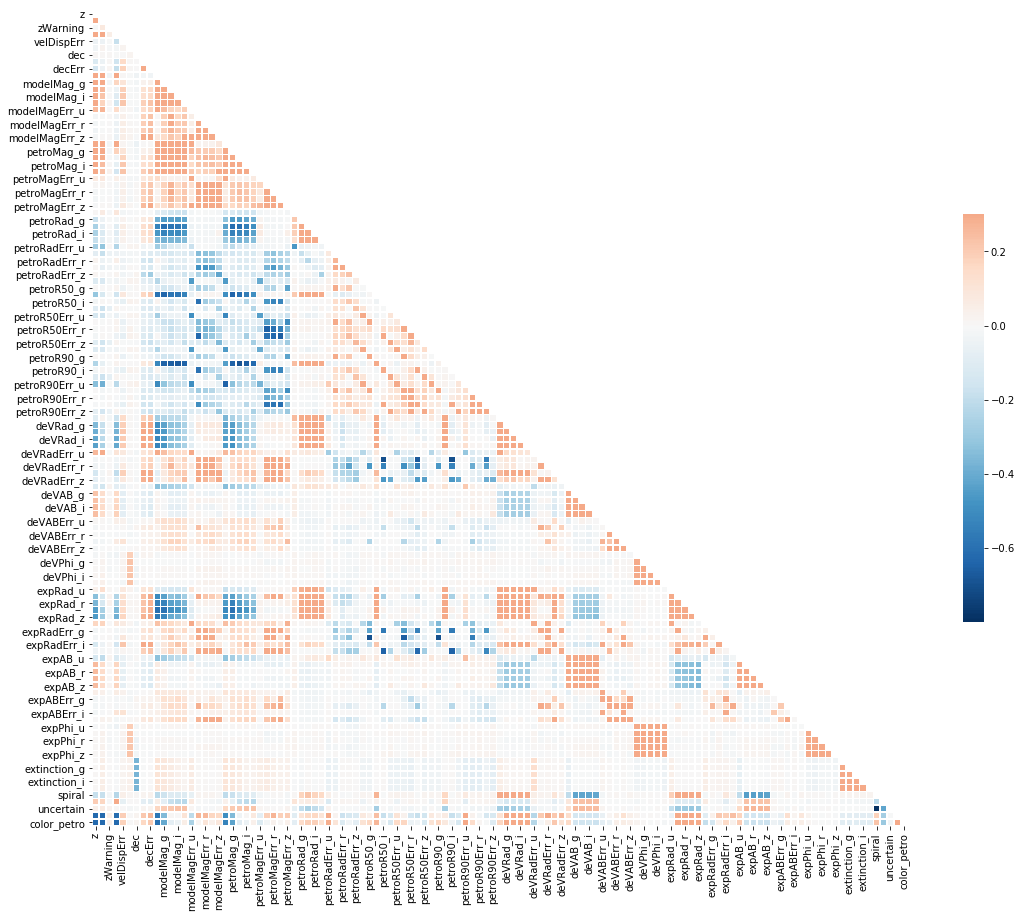

In [23]:
# Generamos la matriz de correlación
# De ser distribuciones normales podríamos usar el Coeficiente de Pearson para calcular la correlación.

corr = data.corr()

# Generamos la máscara para el triángulo superior 
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Seteamos el tipo de figura de matplotlib 
f, ax = plt.subplots(figsize=(20, 15))

# Dibujamos el heatmap con la máscara creada con una paleta de color divergente
seaborn.heatmap(corr, mask=mask, cmap='RdBu_r', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**NOTAS:**    
**a)** Los cuadrados **azules** nos muestran una **correlación negativa** entre el par de variables que lo genera.   

**b)** Los cuadrados **naranjas** nos muestran una **correlación positiva** entre el par de variables que lo genera.    

**c)** Los pares de variables que generan cuadraros **blancos** no están correlacionadas.   

**d)** Las bandas (u, r, g, i, z) y sus errores calculados con el método **ModelMag** tienen una **correlación positiva** con las calculadas con el método **PetroMag**.    

**e)** El **redshift** muestra una **correlación positiva** con las bandas (u, r,g, i, z) ya sean del método **ModelMag** ó **PetroMag**.  
 
**f)** Las variables **expRad...**  tienen una correlación positiva con las variables **petroRad**.              

**g)** Otro grupo de variables correlacionadas positivamente son las **expAB...**  con las **deVAB**.   

**h)** De todos modos cabe aclarar que los índices de correlación positiva son muy bajos.

 ## 2.6) Realicen gráficos boxplot para identificar outliers.

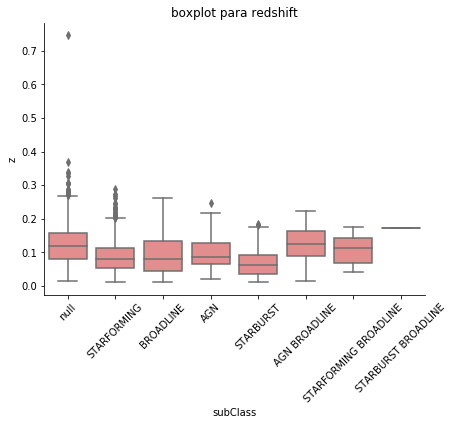

In [24]:
# Gráfico boxplot para redshift

plt.figure (figsize=(15,5))

plt.subplot(121)
plt1=seaborn.boxplot(data=data, color='lightcoral', x='subClass', y='z')
plt.title('boxplot para redshift')
plt.ylabel('z')
plt.xlabel('subClass')
plt.xticks(rotation=45)
seaborn.despine()

**NOTAS:**    
**a)** Las subclases con mayor cantidad de outliers son: **null** y **starforming**.

**b)** En menor medida, las subclases **AGN** y **starburst** poseen algunos outliers.

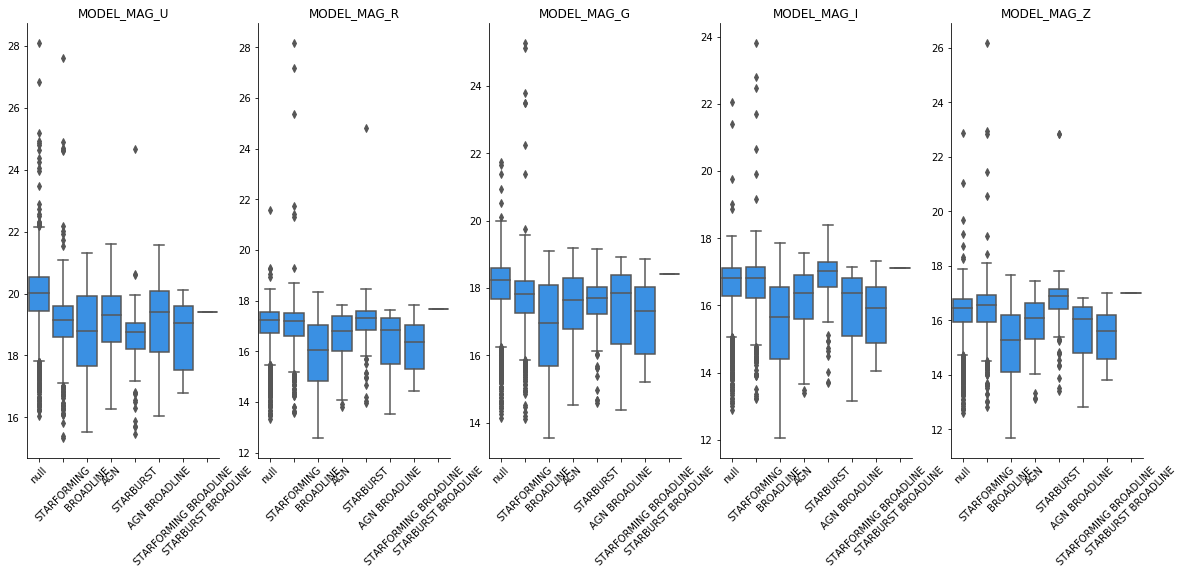

In [25]:
# Gráficos boxplot para las magnitudes modelMag (u, r, g, i, z)

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_u')
plt.title('MODEL_MAG_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_r')
plt.title('MODEL_MAG_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_g')
plt.title('MODEL_MAG_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_i')
plt.title('MODEL_MAG_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='modelMag_z')
plt.title('MODEL_MAG_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTA:**    
**a)** Las subclases con mayor cantidad de outliers son: **null**, **starforming** y **starburst** para todas las bandas calculadas con el método **modelMag**.

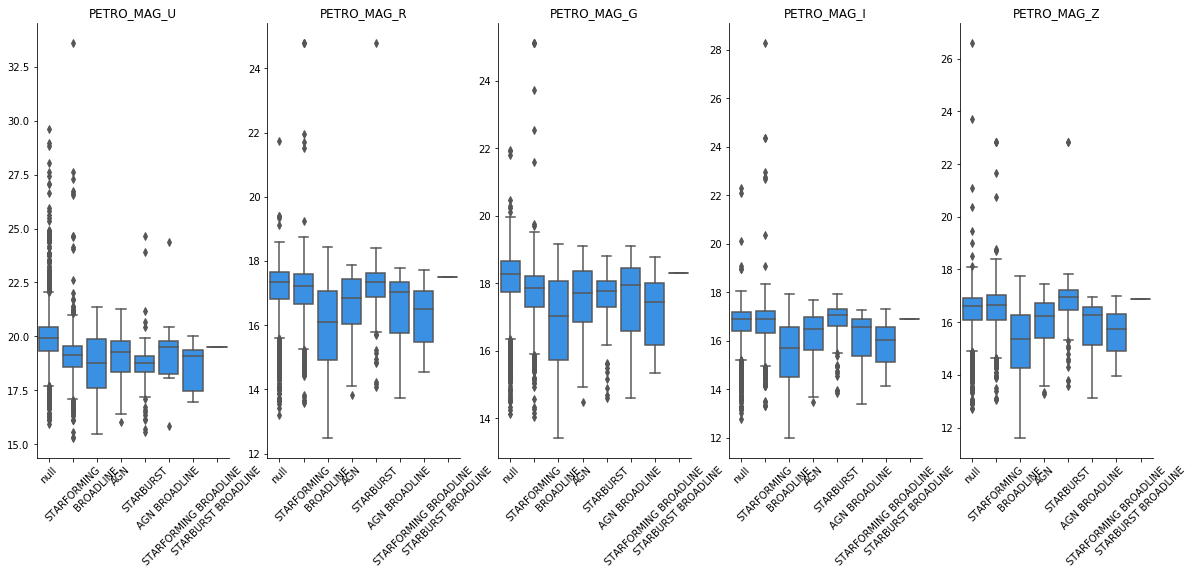

In [26]:
# Gráficos boxplot para las magnitudes petroMag (u, r, g, i, z)

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_u')
plt.title('PETRO_MAG_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_r')
plt.title('PETRO_MAG_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_g')
plt.title('PETRO_MAG_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_i')
plt.title('PETRO_MAG_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='dodgerblue', x='subClass', y='petroMag_z')
plt.title('PETRO_MAG_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTAS:**      
**a)** Las subclases con mayor cantidad de outliers son: **null**, **starforming** y **starburst** para todas las bandas calculadas con el método **petroMag**.   

**b)** Estos resultados se corresponden con los obtenidos para las bandas del método **modelMag**.

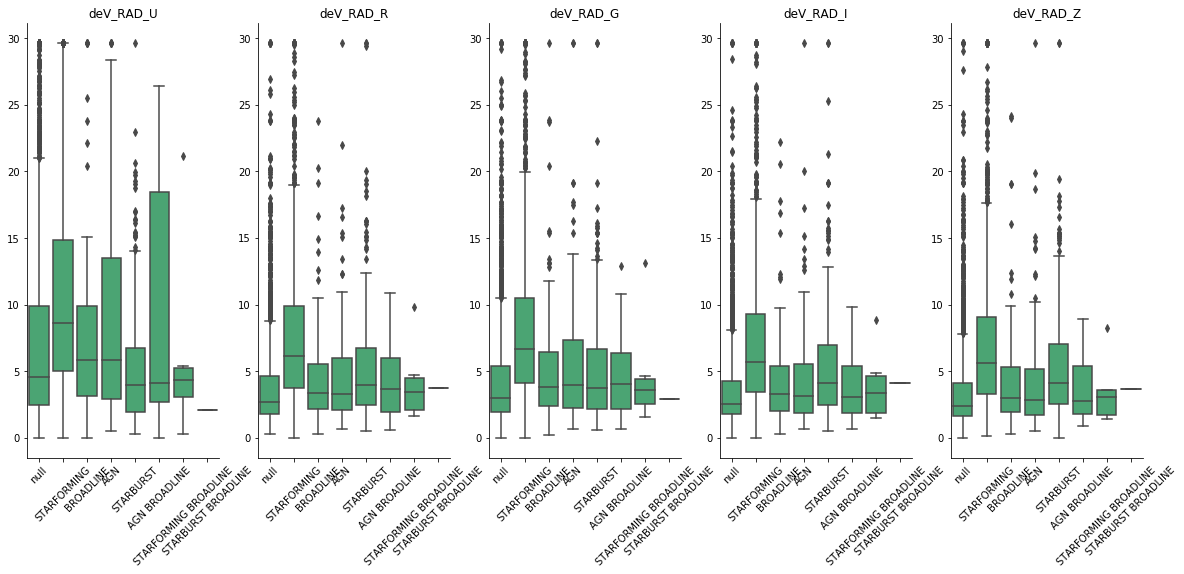

In [27]:
# Gráficos boxplot para los radios de Vaucouleurs

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='deVRad_u')
plt.title('deV_RAD_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='deVRad_r')
plt.title('deV_RAD_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='deVRad_g')
plt.title('deV_RAD_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='deVRad_i')
plt.title('deV_RAD_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='deVRad_z')
plt.title('deV_RAD_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTA:**      
**a)** Todas las subclases poseen outliers para la variable **deVRAD** en las diferentes bandas (u, r, g, i, z).   

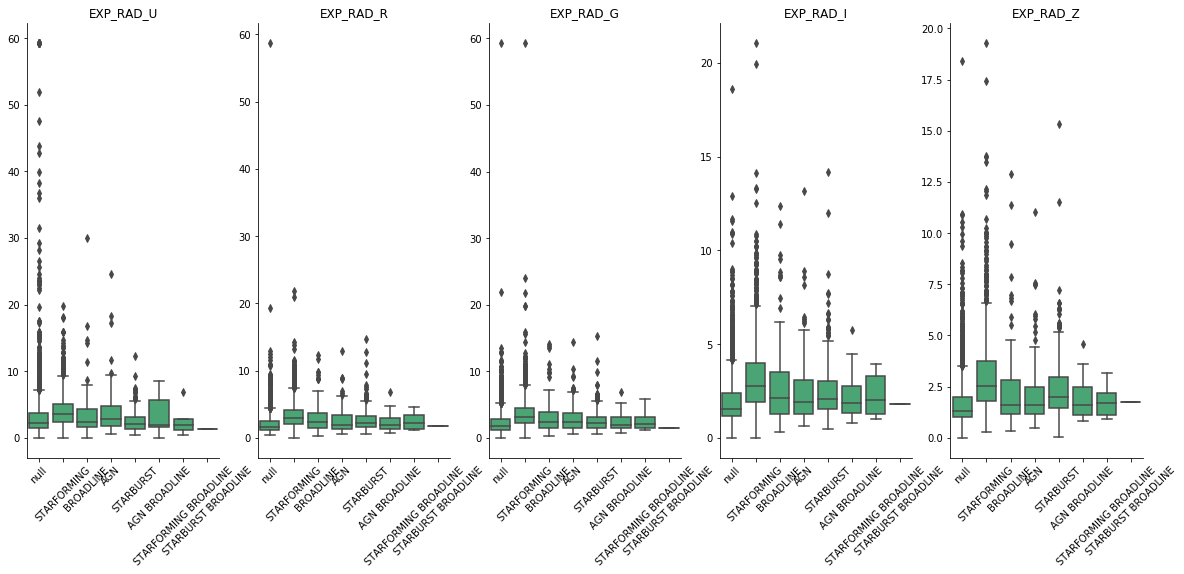

In [28]:
# Gráficos boxplot para los radios exponenciales

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='expRad_u')
plt.title('EXP_RAD_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='expRad_r')
plt.title('EXP_RAD_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='expRad_g')
plt.title('EXP_RAD_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='expRad_i')
plt.title('EXP_RAD_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='expRad_z')
plt.title('EXP_RAD_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTA:**      
**a)** Todas las subclases a excepción de las subclases **starforming broadline** y **starburst broadline** poseen outliers para la variable **expRad** en las diferentes bandas (u, r, g, i, z). 

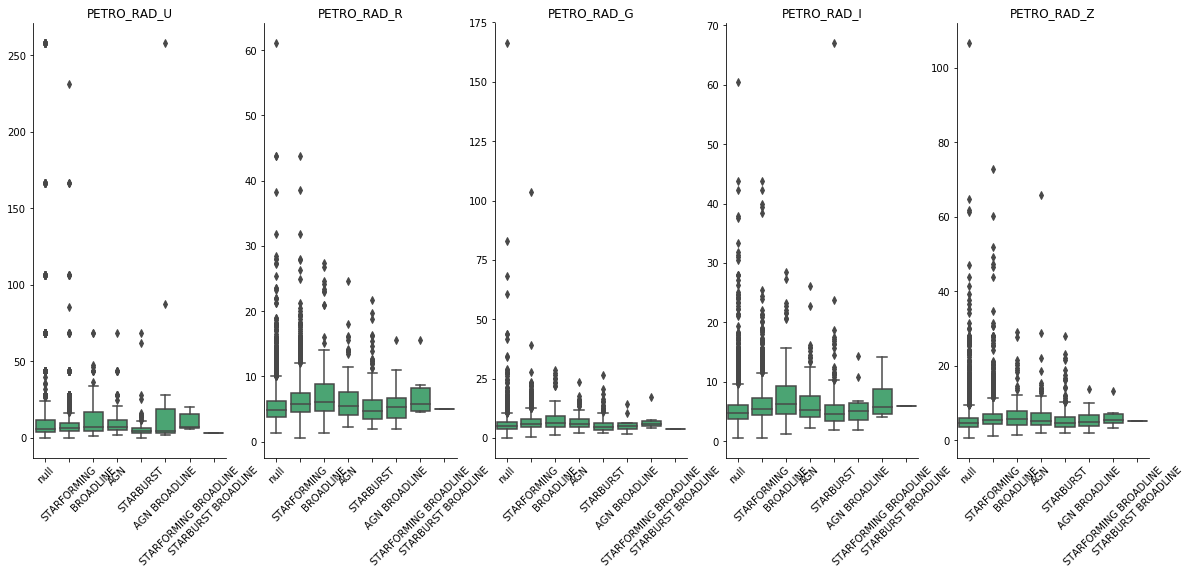

In [29]:
# Gráficos boxplot para los radios petrosianos

plt.figure (figsize=(20,8))

plt.subplot(151)
plt1=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_u')
plt.title('PETRO_RAD_U')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(152)
plt3=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_r')
plt.title('PETRO_RAD_R')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(153)
plt5=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_g')
plt.title('PETRO_RAD_G')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(154)
plt7=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_i')
plt.title('PETRO_RAD_I')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(155)
plt9=seaborn.boxplot(data=data, color='mediumseagreen', x='subClass', y='petroRad_z')
plt.title('PETRO_RAD_Z')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
seaborn.despine()

**NOTAS:**      
**a)** Todas las subclases poseen outliers para la variable **petroRad** en las diferentes bandas (u, r, g, i, z).   

## 2.7) Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?

In [30]:
# restamos petroMag_u - petroMag_g = indice de color

# restamos g-r


# scatterplor magnitud-color

## 2.8) Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.

 ## 2.9) Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

In [32]:
# scipy - test de medianas